# HW #5 Practice Worksheet: Animacy

As practice for HW #5, this Python notebook uses NLTK's feature structure syntax to 

## Helper Functions

One of the powers of using a notebook like this is that is essentially an interpreter, so we can treat it like an interactive sandbox, with some helpful visualization tools as well. Let's 

In [1]:
import nltk, re

def init_parser(grammar_str):
    """
    Initialize a feature parser based on the input grammar string.
    """
    grammar = nltk.grammar.FeatureGrammar.fromstring(grammar_str)
    return nltk.parse.FeatureIncrementalChartParser(grammar)

def word_tokenize(sent):
    # If you are receiving the "punkt" error, uncomment
    # the following line -- it's not as good a tokenizer
    # but it will function without nltk downloads:
    # return re.split('\s+', sent)
    return nltk.tokenize.word_tokenize(sent)

def init_sents(sent_str):
    """
    Parse in a series of sentences, and their acceptability notation
    as a tuple of (is_valid, sent).
    """
    for sent in [s.strip() for s in sent_str.split('\n') if s.strip()]:
        is_valid = not sent.startswith('*')
        tokens = nltk.tokenize.word_tokenize(re.sub('^\*?\s*', '', sent))
        yield is_valid, tokens

# A few IPython visualization tools
from IPython.core.display import display_html, display_png
def csscolor(s, c): return '<span style="color: {};">{}</span>'.format(c, s)
def html(s): display_html(s, raw=True)
    
def check_coverage(grammar_str, sent_str):
    """
    A helper function to iterate over our defined grammar and sentence key,
    and tell us whether or not we got the answer right for the given sentence.
    
    :type sent_list: list[str]
    """
    ret_str = ''
    parser = init_parser(grammar_str)
    for is_valid, tokens in init_sents(sent_str):
        valid_marker = '' if is_valid else '&#42; '
        sent_repr = '{}{}'.format(valid_marker, ' '.join(tokens))
        
        def sent_error(extra=''):
            html('\u274C &nbsp;' + csscolor(sent_repr + extra, 'red'))
        def sent_success(extra=''):
            html('\u2705 &nbsp;' + csscolor(sent_repr + extra, 'green'))
        try:
            parses = list(parser.parse(tokens))
        except ValueError as ve:
            html('\u274C ' + csscolor(str(ve), 'red'))
            continue
        
        if not parses:
            if is_valid:
                sent_error()
            else:
                sent_success()
        else:
            first_parse = ' {}'.format(parses[0])
            if is_valid:                   
                sent_success(str(parses[0]))
            else:
                sent_error(str(parses[0]))
            # Comment out the following line if you're receiving
            # a "tkinter" error:
            display_png(parses[0])
            
    display_html(ret_str, raw=True)

# Practice

Note that in the sentences below, *"**gifted**,"*  is a ditransitive verb that requires the indirect object to be animate (in my idiolect). 

*(with thanks to Shannon for suggesting it)* — *"**made**,"* on the other hand, does not have such a distinction and can have this requirement left unspecified.



✅   John reached the summit on Tuesday .(S[]
 (S[-INV]
 (NP[GEN='mas', NUM='sg'] (PropN[GEN='mas', NUM='sg'] John))
 (VP[-AUX]
 (V[-AUX, NUM='sg', +ODEST, -ODUR, SUBCAT='trans'] reached)
 (NP[NUM='sg'] (Det[] the) (Nom[NUM='sg'] (N[NUM='sg'] summit)))
 (PP[+DEST, +DUR] (P[+DEST, +DUR, +on] on) (NP[] Tuesday))))
 (PUNC[] .))

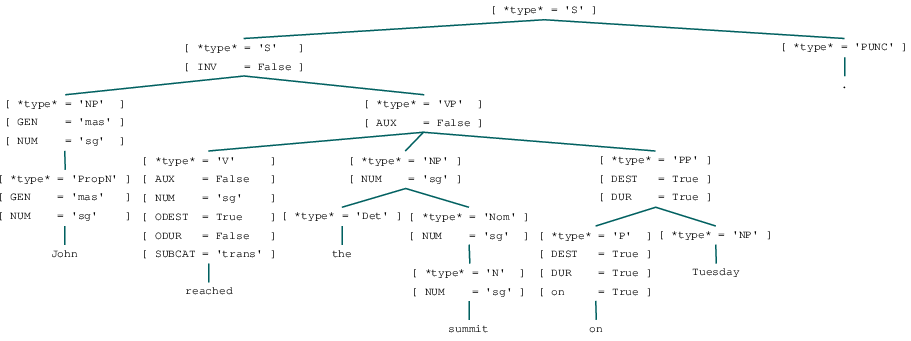

In [4]:
#WORKING CELL KEEP THIS

sentences = '''
John reached the summit on Tuesday .
'''

grammar='''

% start S
############################
# Grammar Rules
#############################

# S expansion productions
S -> S PUNC
S[-INV] -> NP[NUM=?n, GEN=?g] VP[NUM=?n, GEN = ?g]
S[-INV]/?x -> NP VP/?x
S[-INV] -> NP S/NP
S[+INV] -> V[+AUX] NP VP
S[+INV]/?x -> V[+AUX] NP VP/?x

SBar -> Comp S[-INV]

# VP expansion productions
VP[-AUX]/?x -> V[SUBCAT=ditrans,-AUX] NP/?x PP
VP[-AUX] -> V[SUBCAT=ditrans,-AUX] NP[NUM=?n] PP
VP[-AUX] -> V[SUBCAT=trans,-AUX] ADJ
VP[GEN =?g,-AUX] -> V[SUBCAT=trans,-AUX] NP[GEN =?g,NUM=?n]
VP[-AUX] -> V[SUBCAT=trans,-AUX,  ODUR = ?du] NP[NUM=?n] PP[DUR = ?du]
VP[-AUX] -> V[SUBCAT=trans,-AUX,  ODEST = ?de] NP[NUM=?n] PP[DEST = ?de]
VP[-AUX] -> V[SUBCAT=trans,-AUX,  ODEST = ?de]  PP
VP[-AUX] -> V[SUBCAT=trans,-AUX,  ODUR = ?du]  PP
VP[-AUX]/?x -> V[SUBCAT=trans,-AUX] NP/?x 
VP[-AUX]/?x -> V[SUBCAT=trans,-AUX] S[-INV]/?x 
VP[-AUX] -> V[SUBCAT=clause, -AUX] SBar
VP[NUM=?n] -> V[SUBCAT=intrans, NUM=?n]

# NP expansion productions
NP/NP ->
NP[NUM=?n] -> N[NUM=?n]
NP[GEN =?g,NUM=?n] -> PropN[GEN =?g, NUM=?n]
NP[GEN =?g,NUM=?n] -> RefPRP[GEN =?g,NUM=?n]
NP[NUM=?n] -> Det[NUM=?n]  Nom[NUM=?n]
NP[NUM=?n] -> CD[NUM=?n] Nom[NUM=?n]

Nom[NUM=?n] -> N[NUM=?n]

# PP expansion productions
PP[ DEST = ?de, DUR = ?du] -> P[DEST = ?de, DUR = ?du] NP[NUM=?n] 

#############################
# Lexical Rules
#############################

Det -> 'the'

PropN[GEN =fem, NUM=sg] -> 'Mary'
PropN[GEN =mas, NUM=sg] -> 'John'

RefPRP[GEN =fem,NUM=sg] -> 'herself'
RefPRP[GEN =mas, NUM=sg] -> 'himself'

N[NUM=sg] -> 'book' | 'summit' | 'shelf' | 'dog' 
N[NUM=pl] -> 'minutes' |'dogs' | 'cats'

NP[+WH] -> 'what'
NP -> 'Tuesday' 

V[+AUX] -> 'did' | 'does'
V[SUBCAT=ditrans,-AUX] -> 'put'
V[SUBCAT=trans,-AUX, NUM=sg] -> 'know' | 'knows' | 'think' | 'saw' | 'was' 
V[SUBCAT=trans,-AUX, NUM=sg, ODEST = True, ODUR = False] -> 'reached'
V[SUBCAT=trans,-AUX, NUM=sg, ODEST = False, ODUR = True] -> 'walked'
V[SUBCAT=clause, -AUX] -> 'thought'
V[SUBCAT=intrans,TENSE=pres,  NUM=sg] ->  'barks'
V[SUBCAT=intrans,TENSE=pres,  NUM=pl] -> 'bark'

Comp -> 'that'

P[+on, DEST = True, DUR = True] -> 'on'
P[+for,  DEST = False, DUR = True] -> 'for'

PUNC -> '.' | '?'

ADJ -> 'interesting'

CD[NUM=pl] -> 'five'

'''

check_coverage(grammar, sentences)